#Installing dependencies, libraries and requirement

In [ ]:
!pip install git+https://github.com/neuml/txtai#egg=txtai[pipeline]

  Cloning https://github.com/neuml/txtai to /tmp/pip-install-axsa5mwu/txtai_e41a9a9832b440aba4b528869f4b52f2
  Running command git clone -q https://github.com/neuml/txtai /tmp/pip-install-axsa5mwu/txtai_e41a9a9832b440aba4b528869f4b52f2
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done


In [ ]:
import pandas as pd
import seaborn as sns
import nltk
import random
import numpy as np 

from nltk.corpus import wordnet
nltk.download('wordnet')
from nltk.corpus import stopwords
nltk.download('stopwords')
from txtai.pipeline import Translation

In [ ]:
pd.options.mode.chained_assignment = None

In [ ]:
pd.set_option('display.max_colwidth', None)

#Create a translation instance

In [ ]:
#translation model
translate = Translation()

#Get the data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = "/content/drive/MyDrive/FYP Code/Data/EDA Dataset (Symbols & Emojis).csv"
df = pd.read_csv(path)

#Translate tweets in the dataframe for oversampling purpose

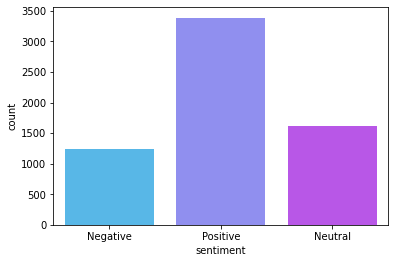

In [ ]:
#histogram for sentiment frequency
sns.countplot(x ='sentiment', data = df, palette = "cool")

##Oversample negative tweets

In [ ]:
#change values in the column into numbers
#df['sentiment'] = df['sentiment'].map({'Positive': 1, 'Negative': -1, 'Neutral': 0})

In [ ]:
#translate all negative tweets into spanish
negTweetsDF = df[(df.sentiment == 'Negative')]
negTweetsDF['spanish'] = negTweetsDF['text'].map(lambda x : translate(x, 'es'))

In [ ]:
negTweetsDFEng = negTweetsDF

In [ ]:
negTweetsDFEng = negTweetsDF.drop(['spanish'], axis = 1)

In [ ]:
negTweetsDFSp = negTweetsDF.drop(['text'], axis = 1)

In [ ]:
negTweetsDFSp['text'] = negTweetsDFSp['spanish'].map(lambda x : translate(x, 'en'))

In [ ]:
latestDF = negTweetsDFSp.drop(['spanish'], axis = 1)

In [ ]:
result = latestDF.append(latestDF)

In [ ]:
filename = 'data augmentation.csv'
latestDF.to_csv(filename, encoding='utf-8-sig') 

##Oversample neutral tweets

In [75]:
#translate all neutral tweets into spanish
neuTweetsDF = df[(df.sentiment == 'Neutral')]
neuTweetsDF['spanish'] = neuTweetsDF['text'].map(lambda x : translate(x, 'es'))

Downloading:   0%|          | 0.00/1.11k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/317M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/793k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/800k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.23M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.11k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/182M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/297k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/298k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/118k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/44.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.11k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/290M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/809k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/799k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.40M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

KeyboardInterrupt: ignored

In [ ]:
neuTweetsDFEng = neuTweetsDF

In [ ]:
neuTweetsDFEng = neuTweetsDF.drop(['spanish'], axis = 1)

In [ ]:
neuTweetsDFSp = neuTweetsDF.drop(['text'], axis = 1)

In [ ]:
neuTweetsDFSp['text'] = neuTweetsDFSp['spanish'].map(lambda x : translate(x, 'en'))

In [ ]:
latestDF = neuTweetsDFSp.drop(['spanish'], axis = 1)

In [ ]:
result = latestDF.append(latestDF)

In [ ]:
filename = 'data augmentation.csv'
latestDF.to_csv(filename, encoding='utf-8-sig') 

#Synonym Replacement

In [ ]:
def get_synonyms(word):
    
    synonyms = set()
    
    for syn in wordnet.synsets(word):
        for l in syn.lemmas():
            synonym = l.name().replace("_", " ").replace("-", " ").lower()
            synonym = "".join([char for char in synonym if char in ' qwertyuiopasdfghjklzxcvbnm'])
            synonyms.add(synonym) 
    if word in synonyms:
        synonyms.remove(word)
    
    return list(synonyms)

stop_words = []
for w in stopwords.words('english'):
    stop_words.append(w)

def synonym_replacement(words, n):
    
    words = words.split()
    
    new_words = words.copy()
    random_word_list = list(set([word for word in words if word not in stop_words]))
    random.shuffle(random_word_list)
    num_replaced = 0
    
    for random_word in random_word_list:
        synonyms = get_synonyms(random_word)
        
        if len(synonyms) >= 1:
            synonym = random.choice(list(synonyms))
            new_words = [synonym if word == random_word else word for word in new_words]
            num_replaced += 1
        
        if num_replaced >= n: #only replace up to n words
            break

    sentence = ' '.join(new_words)

    return sentence

In [ ]:
#get synonym replacement for negative and neutral tweets
negTweetsDF = df[(df.sentiment == 'Negative')]
negTweetsDF['text_sr'] = negTweetsDF['text'].map(lambda x : synonym_replacement(x, 5))
neuTweetsDF = df[(df.sentiment == 'Neutral')]
neuTweetsDF['text_sr'] = neuTweetsDF['text'].map(lambda x : synonym_replacement(x, 5))